## 介绍

这次练习中，我们将使用葡萄酒质量数据集。该数据集包含葡萄酒的各种化学性质，如酸度、糖分、PH值和酒精含量等，还包括两列分别表示葡萄酒的质量（3-9，越高越好）和酒的颜色（红或者白）。数据保存在`Wine_Quality_Data.csv`文件中。

## 第一步：导入与处理数据

* 导入数据
* 绘制数据集的`pairplot`
* 用`color`列创建目标变量`y`，`y`为只取0/1二值的列，1表示“red”
* 计算每列与`y`的相关性，并显示成一个柱形图
* 挑选出与`y`最相关（相关性的绝对值最大）的两列生成`X`
* 用MinMaxScaler缩放`X`。注意：缩放后输出的是一个np.array，将它重新变成一个DataFrame

In [9]:
# read Wine_Quality_Data.csv into a DataFrame
import pandas as pd
data = pd.read_csv("Wine_Quality_Data.csv")
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


D:\python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


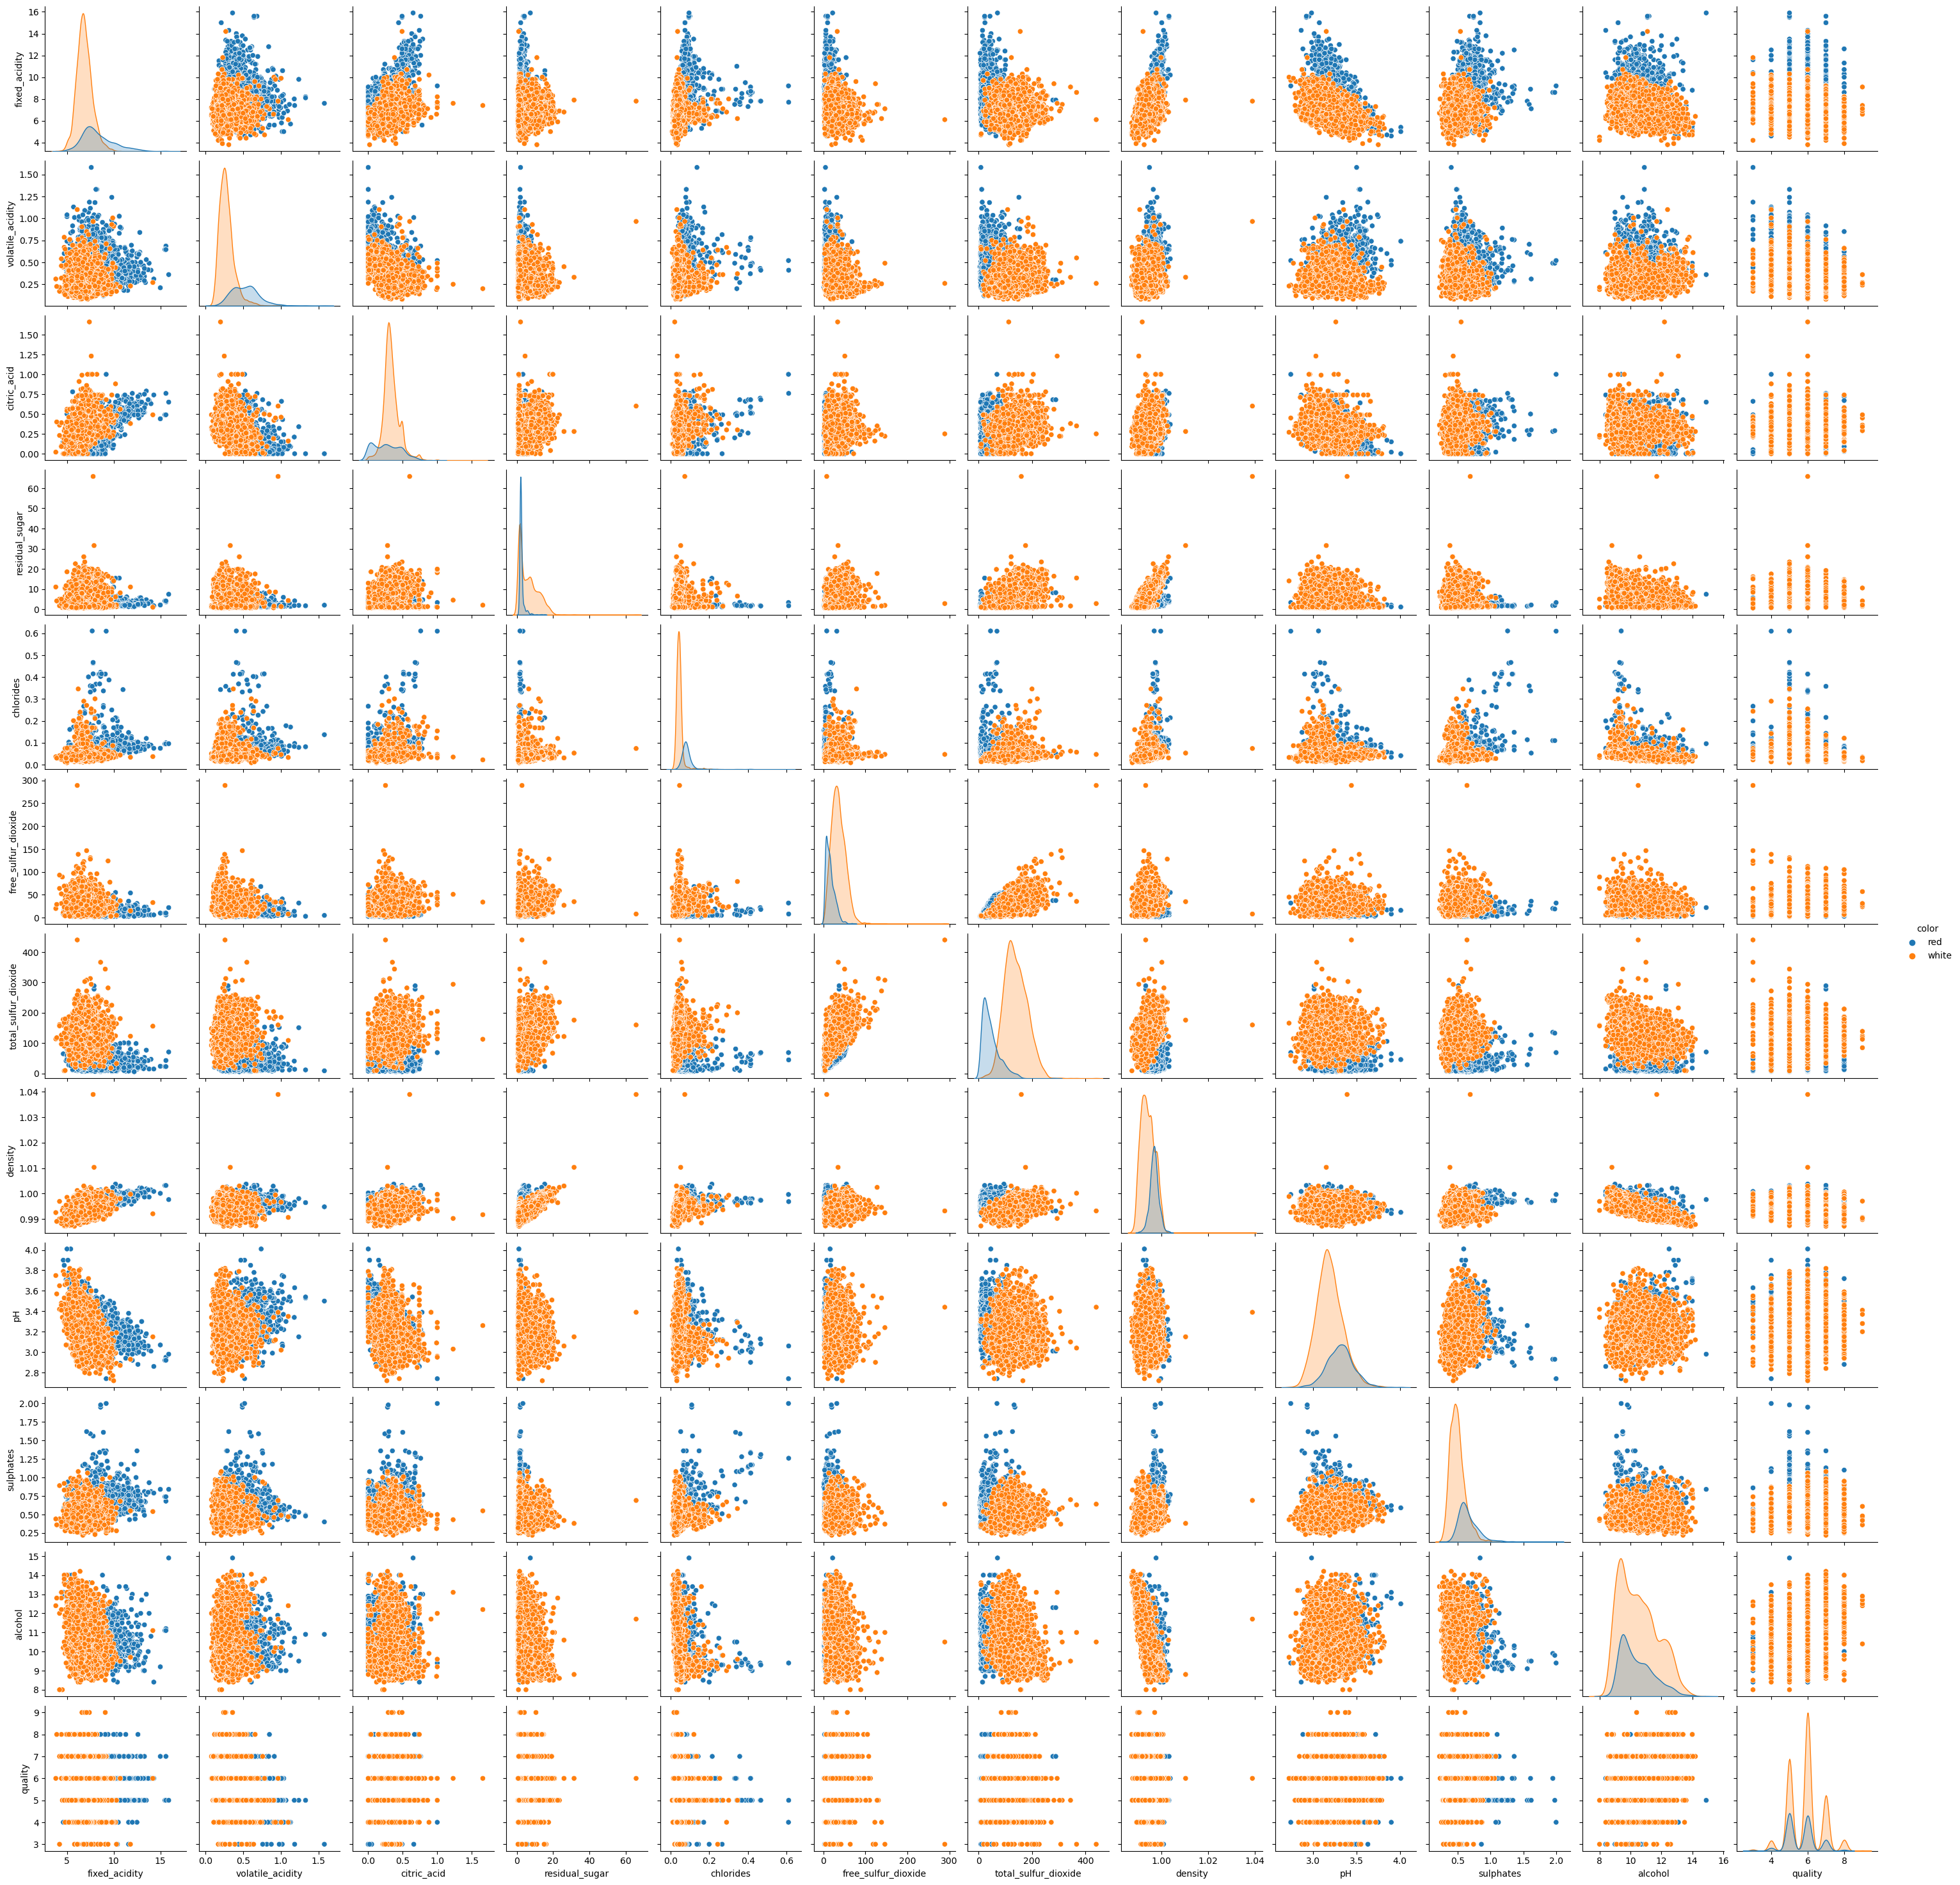

In [11]:
# draw pairplot

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.pairplot(data, hue='color')

In [13]:
# create y

y = data.color.map(lambda x: 1 if x=='red' else 0)

In [15]:
# compute correlation of each column with "color"

fields = list(data.columns[:-1])
correlations = data[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

total_sulfur_dioxide   -0.700357
free_sulfur_dioxide    -0.471644
residual_sugar         -0.348821
citric_acid            -0.187397
quality                -0.119323
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
dtype: float64

<Axes: >

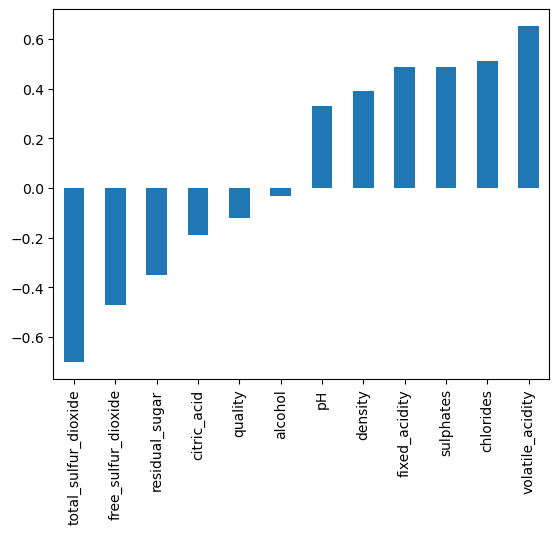

In [17]:
correlations.plot(kind='bar')

In [19]:
# create X

fields = correlations.map(abs).sort_values().iloc[-2:].index
print(fields)

X = data[fields]

Index(['volatile_acidity', 'total_sulfur_dioxide'], dtype='object')


In [21]:
# use MinMax to scale X
from sklearn.preprocessing import MinMaxScaler    
scaler = MinMaxScaler()  
X = scaler.fit_transform(X)


## 第二步：线性SVC

训练LinearSVC分类器，绘制并观察其决策边界（可以尝试多种不同的参数设置）。绘制决策边界的函数参考了sklearn文档中的[例子](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py)。 

In [28]:
# Helper function to plot a decision boundary.
import numpy as np
def plot_decision_boundary(clf, X, y_color, h=0.01):
    # Set min and max values and generate a grid of points with gap h between them
    x_min, x_max = X[:, 0].min()-.1, X[:, 0].max()+.1
    y_min, y_max = X[:, 1].min()-.1, X[:, 1].max()+.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the value for the whole gid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and the training examples
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contourf(xx, yy, Z, cmap=plt.cm.autumn_r, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y_color, cmap=plt.cm.autumn, alpha=1)
    ax.set(xlabel=fields[0], ylabel=fields[1], title=str(clf))

In [32]:
# Pick 400 samples from X and get the corresponding y value. This is because original dataset is too large and it produces a crowded plot.
X_sample = X.sample(400, random_state=45)  
y_sample = y.loc[X_sample.index]  
# create y_color so that it has the value "red" for 1 and 'yellow' otherwise.
y_color = y_sample.map(lambda r: 'red' if r == 1 else 'yellow')

AttributeError: 'numpy.ndarray' object has no attribute 'sample'

In [25]:
# plot the decision boundary for LinearSVC
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
lsvc.fit(X, y)

# plot_decision_boundary(lsvc, X_sample.values, y_color.values, h=0.005)

from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(lsvc, X_sample, response_method="predict", xlabel=fields[0], ylabel=fields[1], alpha=0.5)

disp.ax_.scatter(X_sample.iloc[:, 0], X_sample.iloc[:, 1], c=y_color, edgecolor="black")
disp.ax_.set_xlim(X_sample.iloc[:, 0].min()-.1, X_sample.iloc[:, 0].max()+.1)
disp.ax_.set_ylim(X_sample.iloc[:, 1].min()-.1, X_sample.iloc[:, 1].max()+.1)
disp.figure_.set_size_inches(8,8)

D:\python\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


NameError: name 'X_sample' is not defined

## 第三步：高斯核函数SVC

训练使用高斯核函数的SVC分类器，绘制并观察其决策边界随不同参数值的变化。
* 用以下不同的`gamma`值分别创建高斯核函数SVC分类器，绘制并观察它们的决策边界：  
`gammas = [.5, 1, 2, 10]`
* 保持`gamma`值不变（等于2），用以下不同的`C`值创建高斯核函数SVC分类器，绘制并观察它们的决策边界：  
`Cs = [.1, 1, 10]`

In [ ]:
from sklearn.svm import SVC

gammas = [.5, 1, 2, 10]
for gamma in gammas:
    svc_Gaussian = SVC(kernel='rbf', gamma=gamma)
    svc_Gaussian.fit(X, y)
    plot_decision_boundary(svc_Gaussian, X_sample.values, y_color.values, h=0.005)

In [ ]:
# hold gamma=2, plot decision boundaries for different Cs.
C_values = [0.1,1,10]
gamma = 2
for C in C_values:
    clf = SVC(kernel = 'rbf',gamma=gamma,C =C)
    clf.fit(X,y)
    plot_decision_boundary(clf,X_sample.values, y_color.values,h = 0.005)

## 第三步：多项式核函数SVC

训练使用3次方的多项式核函数的SVC分类器，绘制并观察其决策边界随不同参数值的变化：

* 用以下不同的C值创建多项式核函数SVC分类器，绘制并观察它们的决策边界：   
`Cs = [10,20,100,200]`
* 试着找出能产生最佳决策边界的C值

In [ ]:
# Try with Polynomial kernel SVC
Cs =[10,20,100,200]
for C in Cs:
    clf = SVC(kernel='poly', degree=degree, C=C)  
    clf.fit(X,y)
    plot_polynomial_decision_boundary(X, y, clf, f"SVC Decision Boundary for C={C}, degree={degree}")


## 第四步：Nystroem+SGD

比较径向基核函数的SVC与Nystroem+SGD方法的训练速度。使用Jupyter Notebook提供的魔术命令 **`%timeit`** 输出一个代码单元的运行时间。

* 恢复最初的葡萄酒质量数据
* 从“color”列生成`y`，其他列生成`X`
* 用`%%timeit`输出一个径向基核函数SVC分类器的训练时间
* 用`%%timeit`输出下面操作的运行时间：用Nystroem fit_transform数据，然后训练一个SGDClassifier

Nystroem+SGD一般会更快一些，尤其是数据集越大时优势越明显。

* 把X复制5份并串接起来，生成一个五倍大的数据集
* 相应地，把y也拷贝5份并串接起来，变成原来的五倍
* 再次比较上面两种方法的训练速度

In [ ]:
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

y = data.color == 'red'
X = data[data.columns[:-1]]

svc = SVC(kernel='rbf')
nystroem = Nystroem(kernel='rbf')
sgd = SGDClassifier()

In [ ]:
%%timeit
svc.fit(X, y)

In [ ]:
%%timeit
X_transformed = nystroem.fit_transform(X)
sgd.fit(X_transformed, y)

In [ ]:
X2 = pd.concat([X]*5)
y2 = pd.concat([y]*5)

print(X2.shape)
print(y2.shape)

In [ ]:
%timeit
svc.fit(X2, y2)

In [ ]:
%%timeit
X2_transformed = nystroem.fit_transform(X2)
sgd.fit(X2_transformed, y2)

## 第五步：自动调参

使用GridSearchCV自动调优SVC中的超参数：

* 使用全部数据集
* y 被定义为color = 'red'
* 其他列定义为 X
* 划分训练集和测试集
* 设置交叉验证的参数值，以及许多不同gamma 和 C 的值
* 用GridSearchCV自动运行所有可能的参数值组合
* 显示各种参数值组合运行得分的平均值和标准差
* 输出最佳参数值组合

In [ ]:
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV



## 第六步：预测与评价

用上一步得到的最佳的模型
 * 预测测试集中的数据  
 * 显示混淆矩阵、精度和分类报告

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
